In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors

import seaborn as sns

cmap = sns.diverging_palette(220, 15, as_cmap=True)

In [15]:
# Reading Data
df_train = pd.read_csv('train.csv')
df_items = pd.read_csv('items.csv')
df_stores = pd.read_csv('stores.csv')
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)

# To make it more manageable, I'm just taking the data from the current year for the a further analysis
df_2017 = df_train[df_train.index>'2017-1-1']
df_2017 = pd.merge(df_2017, df_items, on='item_nbr', right_index=True)
df_2017 = pd.merge(df_2017, df_stores, on='store_nbr', right_index=True)

C:\Users\ooppa\Anaconda3\envs\tensorflow_windows\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df_train.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-01,0,25,103665,7.0,NaN
2013-01-01,1,25,105574,1.0,NaN
2013-01-01,2,25,105575,2.0,NaN
2013-01-01,3,25,108079,1.0,NaN
2013-01-01,4,25,108701,1.0,NaN


In [17]:
df_2017.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
date,,,,,,,,,,,,
2017-01-02,101690472,1,103520,1.0,False,GROCERY I,1028,0,Quito,Pichincha,D,13
2017-01-03,101804698,1,103520,2.0,False,GROCERY I,1028,0,Quito,Pichincha,D,13
2017-01-05,102021352,1,103520,2.0,False,GROCERY I,1028,0,Quito,Pichincha,D,13
2017-01-06,102123567,1,103520,3.0,False,GROCERY I,1028,0,Quito,Pichincha,D,13
2017-01-07,102226219,1,103520,1.0,False,GROCERY I,1028,0,Quito,Pichincha,D,13


In [18]:
df_grouped_state = df_2017.groupby([pd.TimeGrouper('D'), 'state']).agg({'unit_sales':sum}).reset_index()

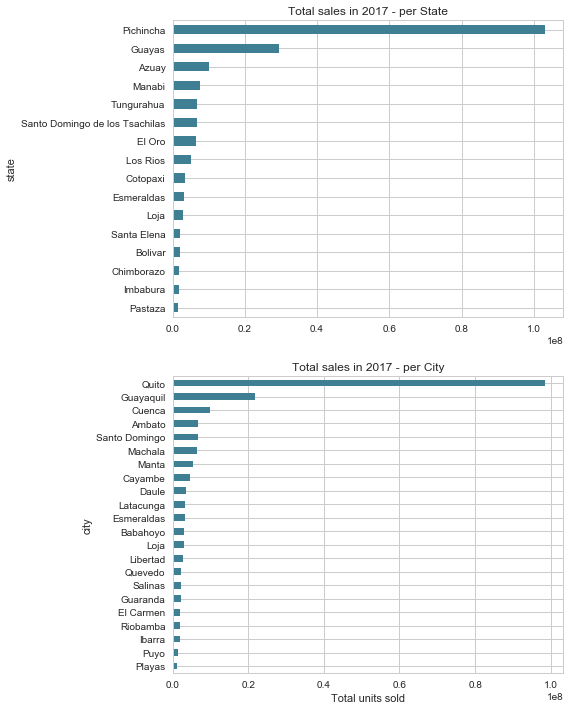

In [19]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, figsize=(7, 12), sharex=False)

df = df_grouped_state.pivot(index='date', columns='state', values='unit_sales').sum()
df.sort_values(ascending=True).plot(kind='barh', colormap=cmap, ax=axes[0])
axes[0].set_title('Total sales in 2017 - per State')
plt.xlabel('Total units sold')

df_grouped_city = df_2017.groupby('city').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True)
df_grouped_city.plot(kind='barh', colormap=cmap, ax=axes[1], legend=False)
axes[1].set_title('Total sales in 2017 - per City')
plt.xlabel('Total units sold')
plt.show()

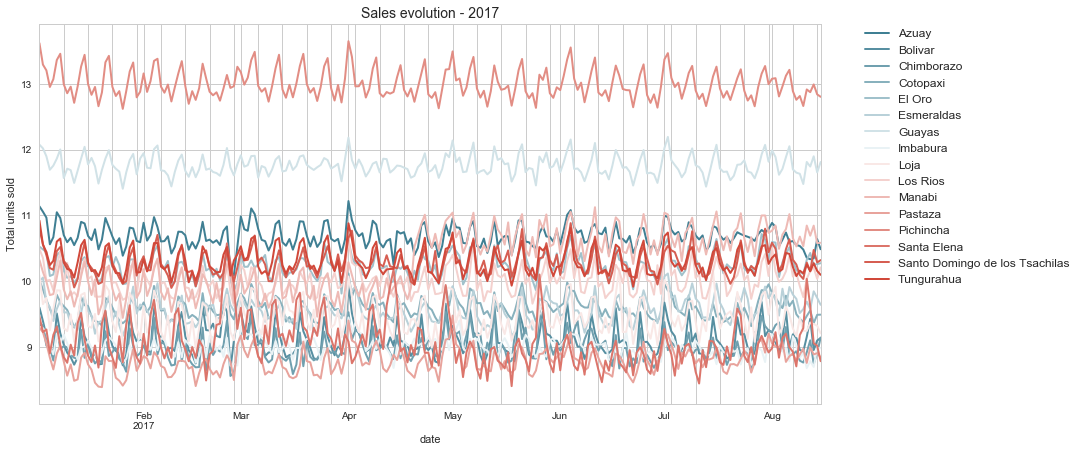

In [20]:
ax = np.log(df_grouped_state.pivot(index='date', columns='state', values='unit_sales')).plot(figsize=(14,7), colormap=cmap, linewidth=2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Sales evolution - 2017', fontsize=14)
plt.ylabel('Total units sold')
plt.grid(which='minor')
plt.show()

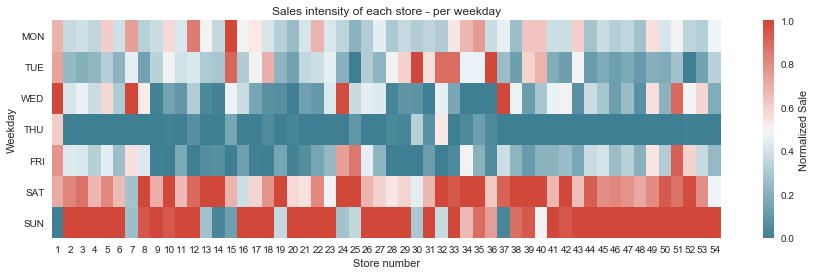

In [21]:
df_2017['weekday'] = [item.weekday() for item in df_2017.index]
df_stores_weekday = df_2017.groupby(['store_nbr', 'weekday']).sum().reset_index()
df_stores_weekday = df_stores_weekday.pivot(index='weekday', columns='store_nbr', values='unit_sales')

plt.figure(figsize=(15,4))
ax = sns.heatmap(df_stores_weekday.apply(lambda col: (col-min(col))/(max(col)-min(col)), axis=0), 
                 cmap=cmap, cbar_kws={'label': 'Normalized Sale'})
ax.set_ylabel('Weekday')
ax.set_xlabel('Store number')
ax.set_yticklabels(['SUN', 'SAT', 'FRI', 'THU', 'WED', 'TUE', 'MON'])
ax.set_title('Sales intensity of each store - per weekday')
plt.yticks(rotation=0)
plt.show()

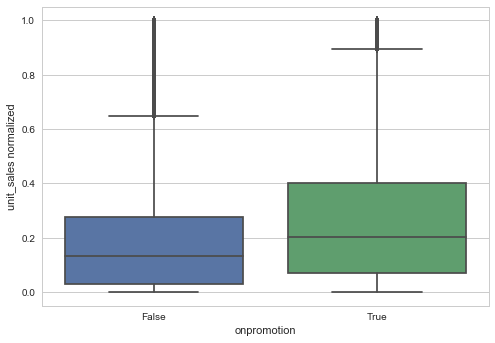

In [22]:
func_norm = lambda df: (df['unit_sales'] - df['unit_sales'].min())/(df['unit_sales'].max() - df['unit_sales'].min())
df_2017 = df_2017[['unit_sales', 'item_nbr', 'store_nbr', 'onpromotion']].set_index(['onpromotion'])
df_2017 = df_2017[df_2017['unit_sales']>0] # Take just positive sales
df_2017 =  df_2017.groupby(['store_nbr', 'item_nbr']).apply(func_norm).reset_index() # Normalize sales item-store

def func(df):
    if len(df['onpromotion'].unique())==2:
        return df
    else:
        pass
    
teste = df_2017.groupby(['item_nbr', 'store_nbr']).apply(func).dropna()

sns.boxplot(x="onpromotion", y="unit_sales", data=teste)
plt.ylabel('unit_sales normalized')
plt.show()

NameError: name 'S' is not defined